In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import beta, gamma
from math import exp
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
x = np.linspace(0,24,num=1000,endpoint=False)

In [3]:
def bdense(x, a, b):
    return x**(a-1)*(1-x)**(b-1)/beta(a,b)

In [4]:
def gdense(x, k, th):
    c = 1 / (gamma(k) * th**k)
    return c * x**(k-1) * np.exp(-x/th)

9 0.7777777777777778
5 2.291666666666667
(0.16690494228012226, 6.216)
(0.16604939764635127, 18.144000000000002)
['0.000', '0.612', '43.326', '306.971', '847.673', '1396.785', '1660.355', '1575.421', '1267.516', '899.073', '577.400', '342.168', '189.744', '99.515', '49.772', '23.895', '11.070', '4.971', '2.171', '0.925', '0.385', '0.157', '0.063', '0.025']


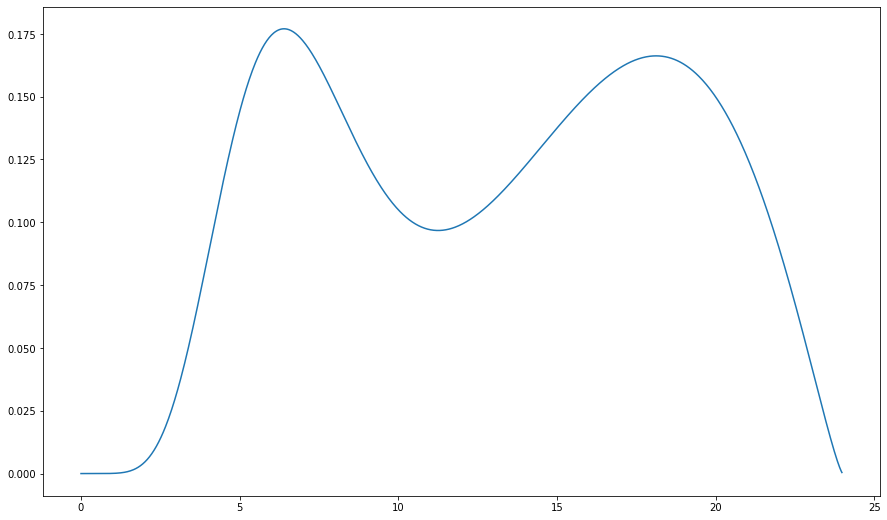

In [5]:
shape = 9
scale = 7/shape
print(shape, scale)
b1 = lambda x: .93 * gdense(x, shape, scale)
a = 5
b = a - (13/24*a)
print(a, b)
b2 = lambda x: .07 * bdense(x/24, a, b)
print(max([(b1(a), a) for a in x]))
print(max([(b2(a), a) for a in x]))
print([f'{10000 * b1(a):.3f}' for a in range(24)])
plt.plot(x, b1(x) + b2(x))

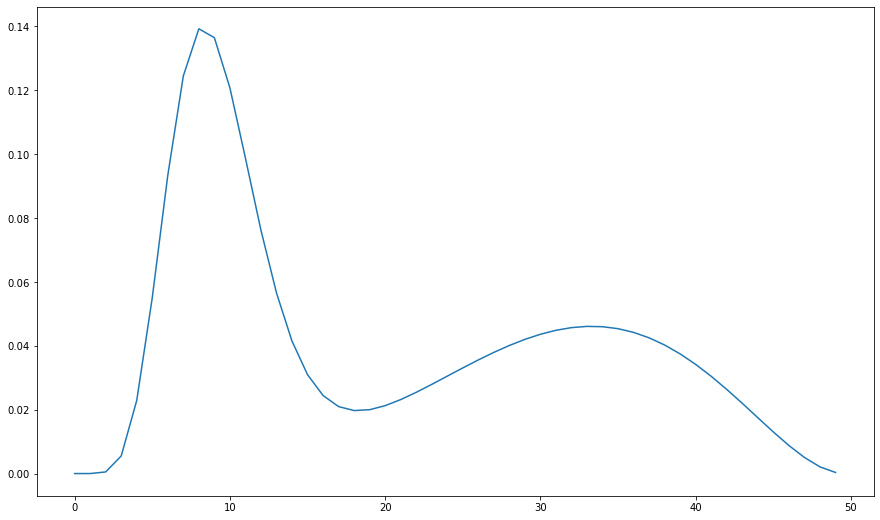

In [6]:
import scipy.stats
xx = np.linspace(1, 50, 50)
xy = np.linspace(0, 49, 50)
plt.plot(scipy.stats.gamma.cdf(xx, 9, 7/9)
         - scipy.stats.gamma.cdf(xy, 9, 7/9)
        + scipy.stats.beta.cdf(xx/50, 5, 2.917)
        - scipy.stats.beta.cdf(xy/50, 5, 2.917))

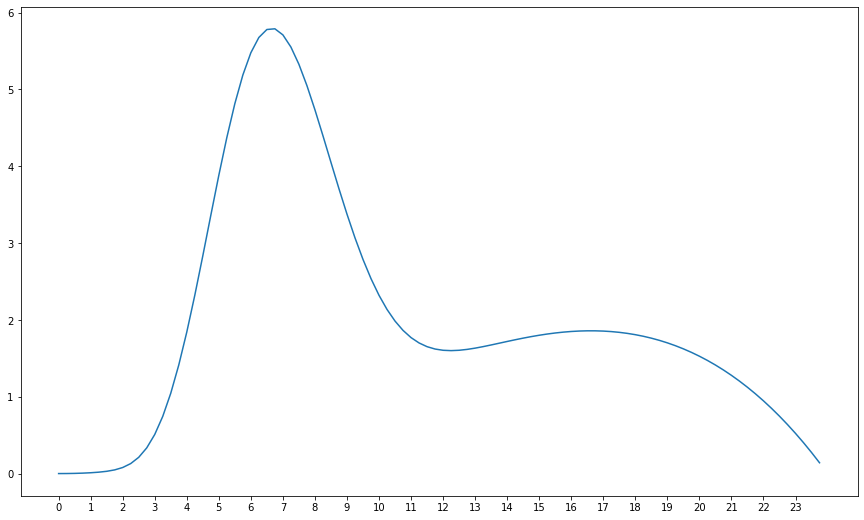

In [7]:
x = np.linspace(0, 1, endpoint=False, num=96)
plt.xticks([i for i in range(24)])
plt.plot(x*24, scipy.stats.beta.pdf(x, 10, 25) + 
        scipy.stats.beta.pdf(x, 3.25, 2))

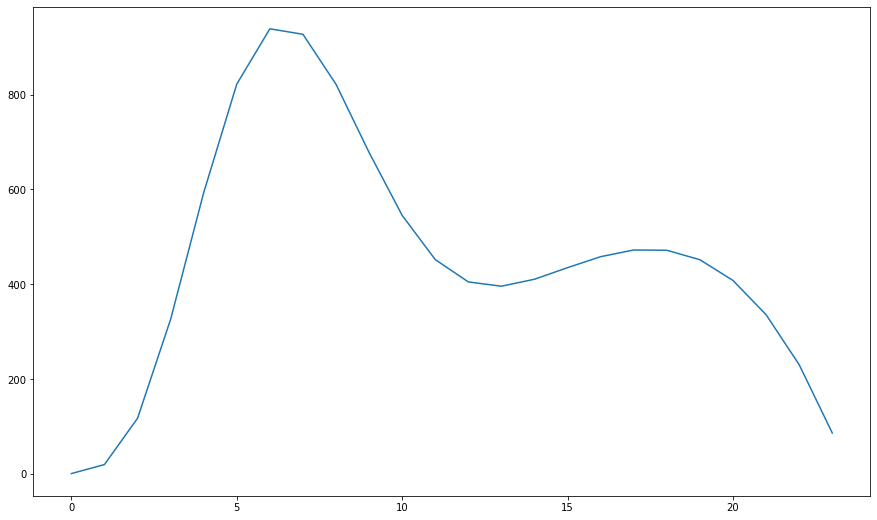

In [16]:
def hourly_demand(x, a, b):
    return 5400 * (scipy.stats.beta.cdf((x+1)/24, a, b) - scipy.stats.beta.cdf(x/24, a, b))
x = np.linspace(0, 23, num=24)
plt.plot(x, hourly_demand(x, 6, 14) + hourly_demand(x, 4, 2))